In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Cars data

In [36]:
## Importing Data
df1 = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\Python\Data\cars - cars.csv")
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner
2,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
3,Mahindra Jeep MM 540,1996,200000,60000,Diesel,Individual,Manual,First Owner
4,Mahindra Jeep CL 500 MDI,1997,150000,120000,Diesel,Individual,Manual,Third Owner


In [37]:
## Info for the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [38]:
## Statistical View of Data
df1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [39]:
## Since the feature 'Name' has multiple sub-categories so we can remove
df1 = df1.drop(columns= ['name'])
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
1,1995,95000,100000,Petrol,Individual,Manual,Second Owner
2,1996,250000,35000,Diesel,Individual,Manual,Second Owner
3,1996,200000,60000,Diesel,Individual,Manual,First Owner
4,1997,150000,120000,Diesel,Individual,Manual,Third Owner


In [40]:
## Converting Categorical features into Numerical Features
lb = LabelEncoder()
od = OrdinalEncoder(categories= [['Individual', 'Dealer', 'Trustmark Dealer']])
df1['fuel'] = lb.fit_transform(df1['fuel'])
df1['seller_type'] = od.fit_transform(df1[['seller_type']])
df1['transmission'] = df1['transmission'].map({'Manual' : 1, 'Automatic' : 0})
df1['owner'] = lb.fit_transform(df1['owner'])

In [41]:
df1.head()
# As we can see all the Data has been converted to Numerical

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1992,50000,100000,4,0.0,1,1
1,1995,95000,100000,4,0.0,1,2
2,1996,250000,35000,1,0.0,1,2
3,1996,200000,60000,1,0.0,1,0
4,1997,150000,120000,1,0.0,1,4


In [42]:
## Spliting the Data for training purposes
x = df1.drop(columns=['owner'])
y = df1['owner']
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 87)

In [43]:
np.round(x_train.describe(), 2)

,year,selling_price,km_driven,fuel,seller_type,transmission
count,3472.00,3472.00,3472.00,3472.00,3472.00,3472.0
mean,2013.08,505114.51,65930.53,2.47,0.28,0.9
std,4.21,592998.39,44395.78,1.51,0.50,0.3
min,1992.00,20000.00,1.00,0.00,0.00,0.0
25%,2011.00,200749.25,35000.00,1.00,0.00,1.0
50%,2014.00,353500.00,60000.00,1.00,0.00,1.0
75%,2016.00,600000.00,90000.00,4.00,1.00,1.0
max,2020.00,8900000.00,400000.00,4.00,2.00,1.0


In [44]:
## Standardizing the data

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)

x_train_new = pd.DataFrame(x_train_sc, columns= x_train.columns)
np.round(x_train_new.describe(), 2)

## As we can see from the output the Mean of the data is 0 and standard deviation is 1

,year,selling_price,km_driven,fuel,seller_type,transmission
count,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.00,-0.82,-1.49,-1.64,-0.56,-2.96
25%,-0.49,-0.51,-0.70,-0.98,-0.56,0.34
50%,0.22,-0.26,-0.13,-0.98,-0.56,0.34
75%,0.69,0.16,0.54,1.01,1.44,0.34
max,1.64,14.16,7.53,1.01,3.43,0.34


In [45]:
## Checking Outliers
x_train_new.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
dtype: int64

<Axes: xlabel='km_driven'>

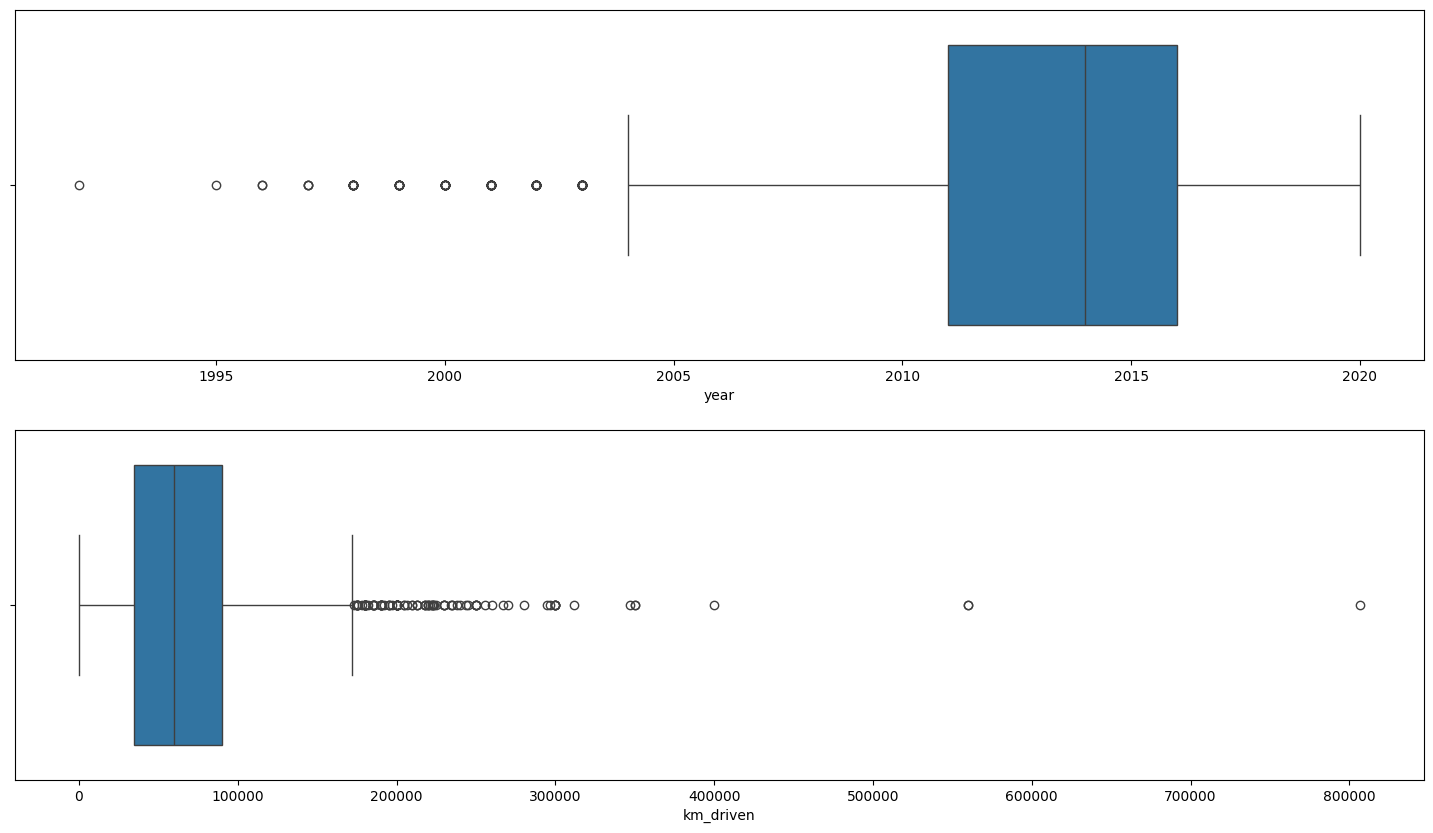

In [ ]:
plt.figure(figsize= ((40, 10)))

plt.subplot(224)
sns.boxplot(x = df1['km_driven'])

In [47]:
## Finding IQR for 'km_driven' Feature
percentile25 = df1['km_driven'].quantile(0.25)
percentile75 = df1['km_driven'].quantile(0.75)

IQR = percentile75 - percentile25
print("Inter-Quartile Range: ", IQR)
print("25 % Data : ", percentile25)
print("75 % Data : ", percentile75)

Inter-Quartile Range:  55000.0
25 % Data :  35000.0
75 % Data :  90000.0


In [48]:
## Setting Limits
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)

print("Lower Limit: ", lower_fence)
print("Upper Limit: ", upper_fence)

Lower Limit:  -47500.0
Upper Limit:  172500.0


In [49]:
## Checking Data
df1[df1['km_driven'] > upper_fence]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
60,2001,150000,256000,1,1.0,1,0
113,2004,180000,200000,4,0.0,1,2
117,2004,225000,223660,1,0.0,0,4
165,2005,200000,223000,1,0.0,1,0
196,2005,175000,250000,1,0.0,1,2
...,...,...,...,...,...,...,...
2856,2015,430000,200000,1,0.0,1,0
2906,2015,530000,175000,1,0.0,1,4
2937,2016,665000,560000,1,1.0,1,0
3201,2016,270000,175000,1,0.0,1,0


In [50]:
df1[df1['km_driven'] < lower_fence]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [51]:
## Copying data into another variable
df1_new = df1.copy()

df1_new['km_driven'] = df1_new['km_driven'].clip(lower_fence, upper_fence)
df1_new.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1992,50000,100000,4,0.0,1,1
1,1995,95000,100000,4,0.0,1,2
2,1996,250000,35000,1,0.0,1,2
3,1996,200000,60000,1,0.0,1,0
4,1997,150000,120000,1,0.0,1,4


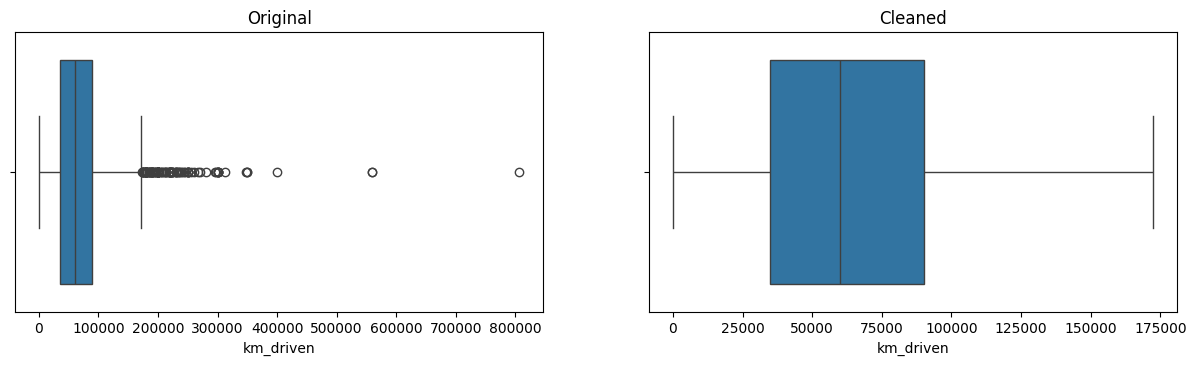

In [52]:
## Comparing Both Data
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 3)
sns.boxplot(x=df1['km_driven'])
plt.title('Original')

plt.subplot(2, 2, 4)
sns.boxplot(x=df1_new['km_driven'])
plt.title('Cleaned')

plt.show()

In [ ]:
def cap_outliers_iqr(df, column):
    df = df.copy()

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower_fence, upper_fence)

    return df

## Credit Scoring Data

In [53]:
## Importing our dataset
df2 = pd.read_csv(r"c:\Users\singh\OneDrive\Desktop\Python\Data\credit_scoring - credit_scoring.csv")
df2.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,3289000,6.28,36,Personal Loan


In [54]:
## Basic Info for the Data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   int64  
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [55]:
## Statiscal Info of Data
np.round(df2.describe(), 2)

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,42.70,0.51,1452.81,5.58,2471401.00,10.69,37.13
std,13.27,0.29,827.93,2.93,1387046.68,5.48,17.44
min,20.00,0.00,0.00,1.00,108000.00,1.01,12.00
25%,31.00,0.25,763.75,3.00,1298000.00,6.02,24.00
50%,42.00,0.53,1428.00,6.00,2437500.00,10.70,36.00
75%,54.00,0.75,2142.00,8.00,3653250.00,15.44,48.00
max,65.00,1.00,2857.00,10.00,4996000.00,19.99,60.00


In [56]:
## On the Gender and Marital Status feature we use OneHotEncoder
columns = df2[['Gender', 'Marital Status']]

ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)

encoded_array = ohe.fit_transform(df2[['Gender', 'Marital Status']])
encoded_cols = ohe.get_feature_names_out(['Gender', 'Marital Status'])

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df2.index)
df2 = pd.concat([df2.drop(['Gender', 'Marital Status'], axis=1), encoded_df], axis=1)

In [57]:
## On the feature 'Education Level' we use Label Encoder
df2['Education Level'] = lb.fit_transform(df2['Education Level'])

In [58]:
## On the 'Employment Status' Feature we use Ordinal Encoder
od_emp = OrdinalEncoder(categories= [['Self-Employed', 'Employed', 'Unemployed']])

df2['Employment Status'] = od_emp.fit_transform(df2[['Employment Status']])

In [59]:
## On the 'Type of Loan' Feature we use get_dummies
loan = pd.get_dummies(df2['Type of Loan'], drop_first=True, dtype=np.int32)
df2 = pd.concat([df2.drop('Type of Loan', axis=1), loan], axis=1)

In [60]:
## Now that we have done all the encoding
df2.head()

,Age,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Gender_Male,Marital Status_Married,Marital Status_Single,Home Loan,Personal Loan
0,60,2,1.0,0.22,2685,2,4675000,2.65,48,1,1,0,0,1
1,25,1,2.0,0.20,2371,9,3619000,5.19,60,1,1,0,0,0
2,30,2,1.0,0.22,2771,6,957000,2.76,12,0,0,1,0,0
3,58,3,2.0,0.12,1371,2,4731000,6.57,60,0,1,0,0,0
4,32,0,0.0,0.99,828,2,3289000,6.28,36,1,1,0,0,1


In [61]:
df2.dtypes

Age                            int64
Education Level                int64
Employment Status            float64
Credit Utilization Ratio     float64
Payment History                int64
Number of Credit Accounts      int64
Loan Amount                    int64
Interest Rate                float64
Loan Term                      int64
Gender_Male                    int32
Marital Status_Married         int32
Marital Status_Single          int32
Home Loan                      int32
Personal Loan                  int32
dtype: object

In [62]:
## Now Applying Function Transformer
log_transform = FunctionTransformer(np.log1p)

df2 = log_transform.transform(df2)
df2.head()

,Age,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Gender_Male,Marital Status_Married,Marital Status_Single,Home Loan,Personal Loan
0,4.110874,1.098612,0.693147,0.198851,7.895808,1.098612,15.357740,1.294727,3.891820,0.693147,0.693147,0.000000,0.0,0.693147
1,3.258097,0.693147,1.098612,0.182322,7.771489,2.302585,15.101709,1.822935,4.110874,0.693147,0.693147,0.000000,0.0,0.000000
2,3.433987,1.098612,0.693147,0.198851,7.927324,1.945910,13.771560,1.324419,2.564949,0.000000,0.000000,0.693147,0.0,0.000000
3,4.077537,1.386294,1.098612,0.113329,7.224025,1.098612,15.369647,2.024193,4.110874,0.000000,0.693147,0.000000,0.0,0.000000
4,3.496508,0.000000,0.000000,0.688135,6.720220,1.098612,15.006094,1.985131,3.610918,0.693147,0.693147,0.000000,0.0,0.693147
